In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [4]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [5]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [6]:
model.classes_

array([0, 1])

In [7]:
print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


In [8]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [9]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [12]:
'Accuracy = '+str(9/10*100)+'%'

'Accuracy = 90.0%'

In [16]:
print(model.score(x, y))
print('Accuracy = '+str(model.score(x, y)*100)+'%')

0.9
Accuracy = 90.0%


In [18]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [17]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

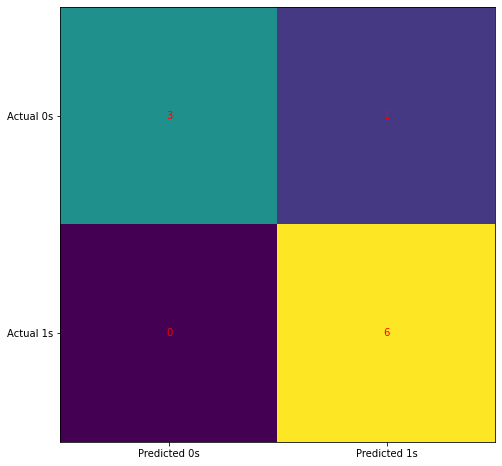

In [19]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [20]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [21]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [22]:
print(model.intercept_, model.coef_)

[-3.51335372] [[1.12066084]]


In [23]:
print(model.predict_proba(x))

[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]


In [25]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [24]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [29]:
model.predict(np.array([100]).reshape(-1, 1))

array([1])

In [30]:
model.score(x, y)

1.0

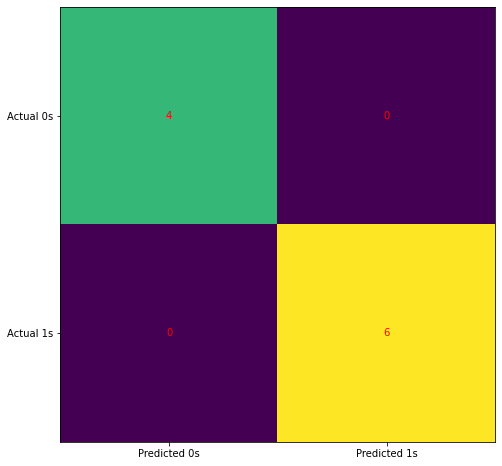

In [31]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [32]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [33]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
x, y = load_digits(return_X_y=True)

In [41]:
len(x), len(y)

(1797, 1797)

In [43]:
1797*.2, 1797*.8

(359.40000000000003, 1437.6000000000001)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

In [80]:
print(x_train)

[[ 0.  0.  0. ... 16. 16.  6.]
 [ 0.  3. 12. ... 16.  2.  0.]
 [ 0.  1. 10. ...  0.  0.  0.]
 ...
 [ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]
 [ 0.  0.  6. ... 11.  0.  0.]]


In [81]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [82]:
print(x_train)

[[ 0.         -0.33790435 -1.09141592 ...  1.58325794  3.53125595
   3.30213343]
 [ 0.          2.90642897  1.41696421 ...  1.58325794  0.00595786
  -0.18695903]
 [ 0.          0.74354009  0.99890086 ... -1.14493411 -0.49765616
  -0.18695903]
 ...
 [ 0.         -0.33790435 -0.04625753 ... -1.14493411 -0.49765616
  -0.18695903]
 [ 0.         -0.33790435 -0.25528921 ... -1.14493411 -0.49765616
  -0.18695903]
 [ 0.         -0.33790435  0.16277415 ...  0.73069792 -0.49765616
  -0.18695903]]


In [83]:
model = LogisticRegression(solver='liblinear',  
                           C=.05, 
                           multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [84]:
x_test = scaler.fit_transform(x_test)

In [85]:
y_pred = model.predict(x_test)

In [86]:
model.score(x_train, y_train)

0.964509394572025

In [87]:
model.score(x_test, y_test)

0.95

In [88]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 2,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]], dtype=int64)

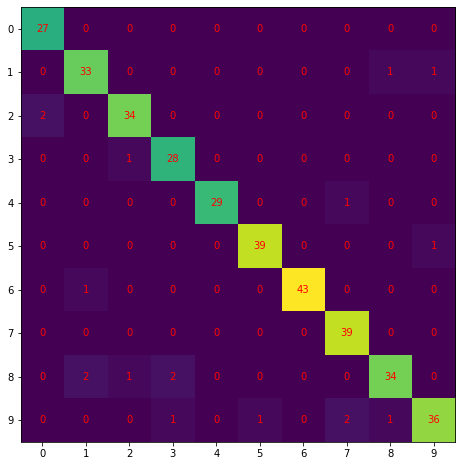

In [95]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [97]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       0.92      0.94      0.93        35
           2       0.94      0.94      0.94        36
           3       0.90      0.97      0.93        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       0.93      1.00      0.96        39
           8       0.94      0.87      0.91        39
           9       0.95      0.88      0.91        41

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [99]:
weather = ['S', 'S', 'O', 'R', 'R', 'R', 'O', 'S', 'S', 'R' ,'S', 'O', 'O', 'R']
temp = ['H', 'H', 'H', 'M', 'C', 'C', 'C', 'M', 'C', 'M', 'M', 'M','H','M']
play = ['N','N','Y','Y','Y','N','Y','N','Y','Y','Y','Y','Y', 'N']

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
le = LabelEncoder()

weather_ec = le.fit_transform(weather)
print(weather_ec)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [102]:
temp_ec = le.fit_transform(temp)
print(temp_ec)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [105]:
label = le.fit_transform(play)
print(label)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [103]:
features = list(zip(weather_ec, temp_ec))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [107]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

model.fit(features, label)

KNeighborsClassifier(n_neighbors=3)

In [111]:
for i in range(40):
    i = i + 1
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(features, label)

In [ ]:
for i in range(40):
model = KNeighborsClassifier(n_neighbors=i)

model.fit(features, label)

In [108]:
predicted = model.predict([[0, 2]])
print(predicted)

[1]
